In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Show 5 random samples from the dataset
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8833,8834,15760873,Lombardo,594,France,Male,50,7,81310.34,1,1,1,183868.01,0
5360,5361,15661349,Perkins,633,France,Male,35,10,0.00,2,1,0,65675.47,0
4483,4484,15774192,Miller,539,Germany,Female,38,8,105435.74,1,0,0,80575.44,1
4187,4188,15677785,Stevenson,656,Spain,Male,32,5,136963.12,1,1,0,133814.28,0
1218,1219,15730038,Docherty,706,France,Female,23,5,0.00,1,0,0,164128.41,1


In [3]:
df.info()
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [6]:
x = df.drop(['Exited'], axis=1)
y = df[['Exited']]

from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
x = obj.fit_transform(x)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=100, validation_split=0.2)

# Checking layer weights (optional for inspection)
model.layers[1].get_weights()
model.layers[0].get_weights()

# Making predictions on the test set
model.predict(xtest)
predict_y = np.where(model.predict(xtest) > 0.5, 1, 0)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7926 - loss: 0.5494 - val_accuracy: 0.7975 - val_loss: 0.4702
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7981 - loss: 0.4543 - val_accuracy: 0.7975 - val_loss: 0.4465
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7920 - loss: 0.4516 - val_accuracy: 0.7975 - val_loss: 0.4358
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7940 - loss: 0.4370 - val_accuracy: 0.8050 - val_loss: 0.4294
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8132 - loss: 0.4219 - val_accuracy: 0.8131 - val_loss: 0.4232
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8222 - loss: 0.4221 - val_accuracy: 0.8213 - val_loss: 0.4163
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8260 - loss: 0.4169 - val_accuracy: 0.8281 - val_loss: 0.4093
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.4043 - val_accu

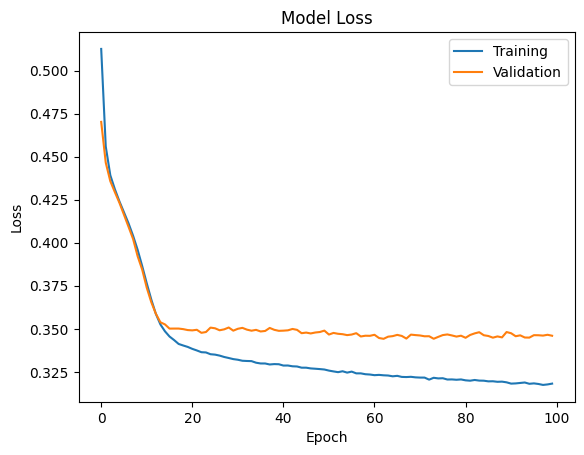

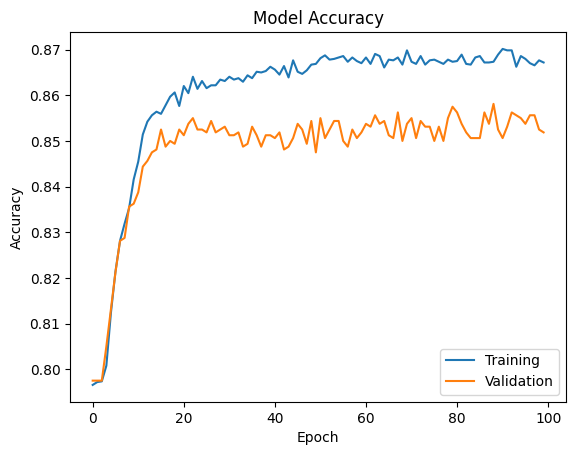

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, predict_y)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training', 'Validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Training', 'Validation'])
plt.show()

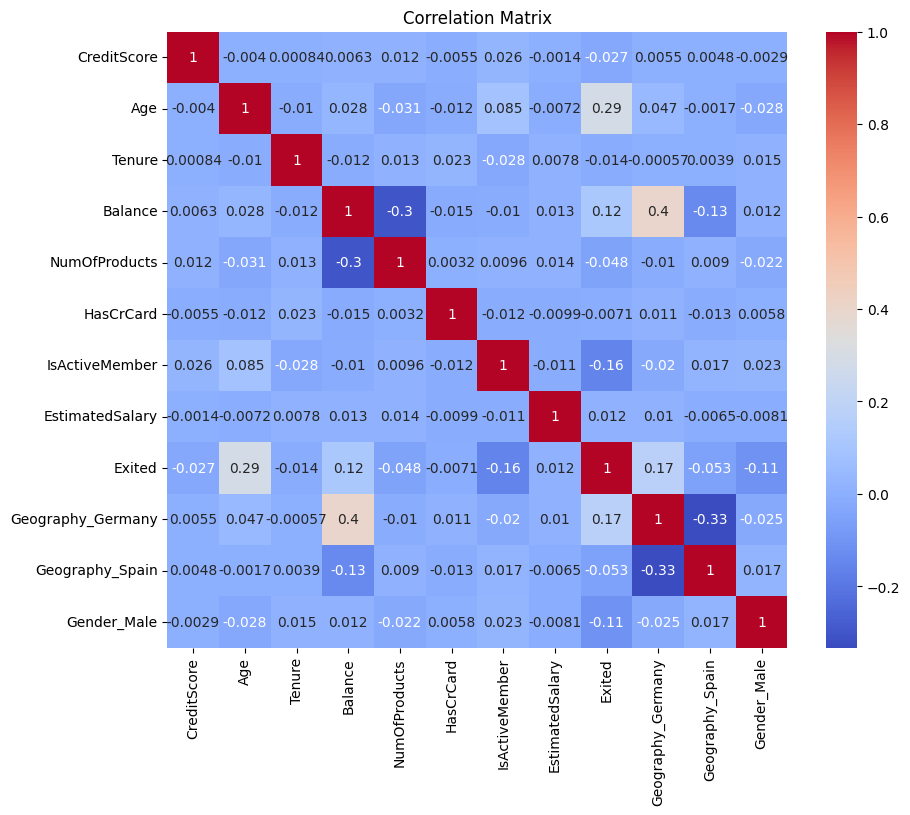

In [10]:
import seaborn as sns

# 1. Correlation Matrix: Understand how features relate to each other and to the target
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

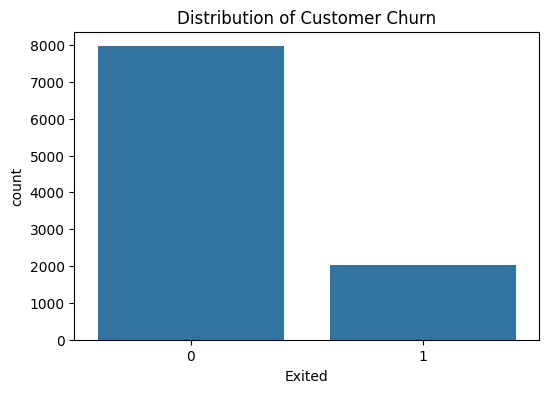

In [11]:
# 2. Distribution of the target variable (Customer Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title("Distribution of Customer Churn")
plt.show()

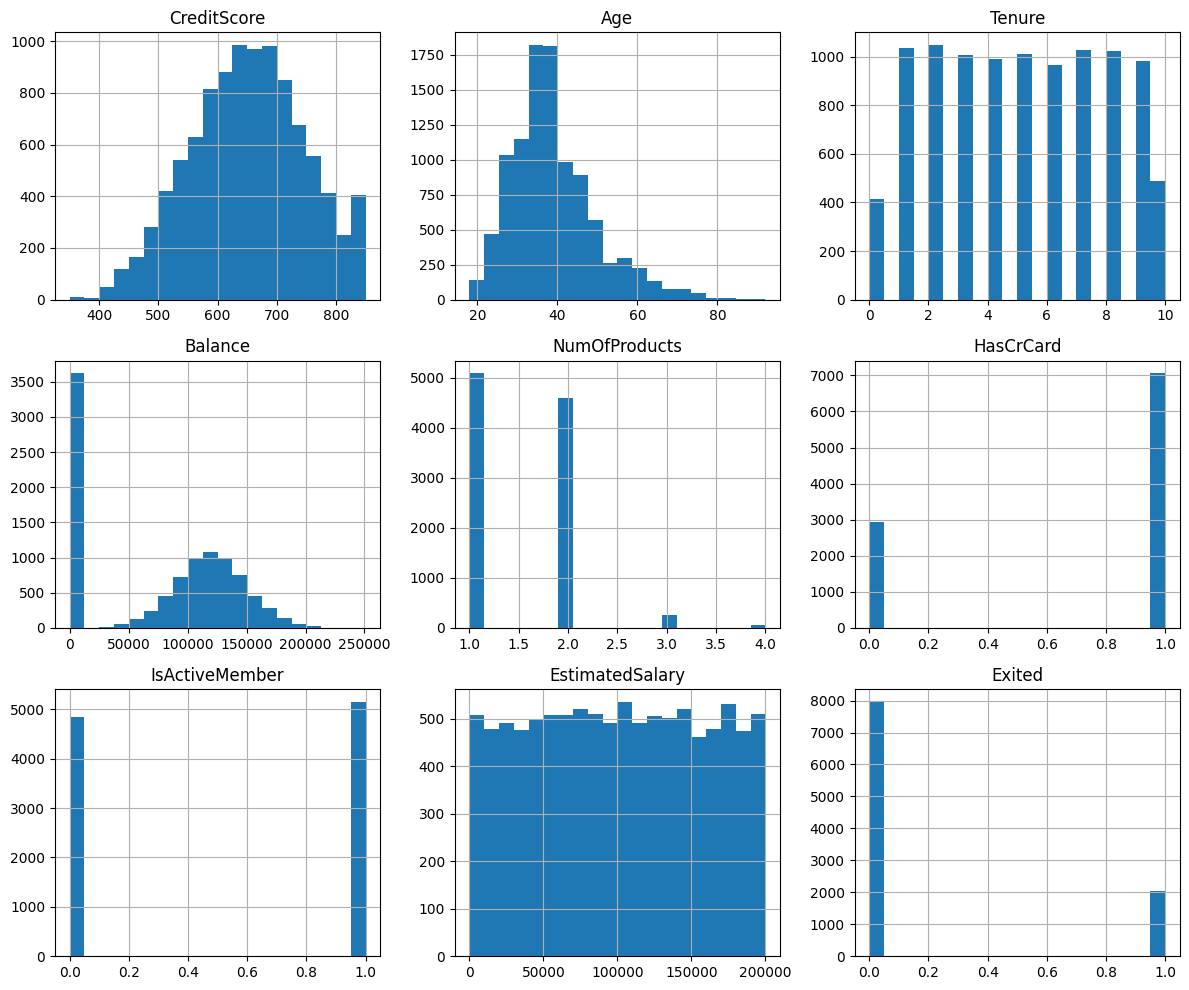

In [12]:
# 3. Histograms for all features: Visualize the distributions
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()